In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=39f8c480f1e70db7f1b0735778f0ee8d2812ffa9a3cd96a0e2060850440117d0
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


In [ ]:
def dj(n, oracle_type):
    qc = QuantumCircuit(n+1, n)
    qc.h(range(n+1))
    if oracle_type == 'constant':
        pass

    elif oracle_type == 'balanced':
        for qubit in range(n):
            qc.cx(qubit, n)

    else:
        raise ValueError("Invalid oracle_type. Use 'constant' or 'balanced'.")
    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc


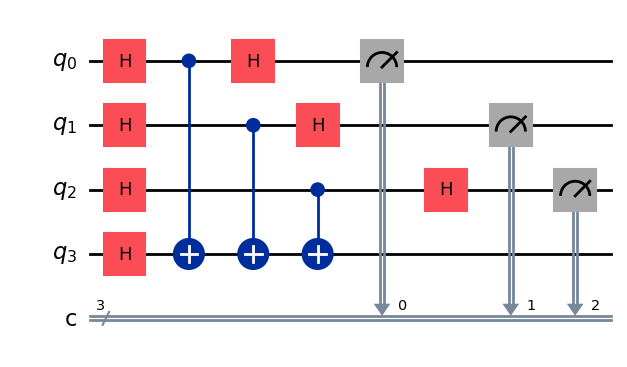

In [ ]:
n=3
oracle_type='balanced'
dj_ckt=dj(n,oracle_type)
dj_ckt.draw(output='mpl')

In [ ]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

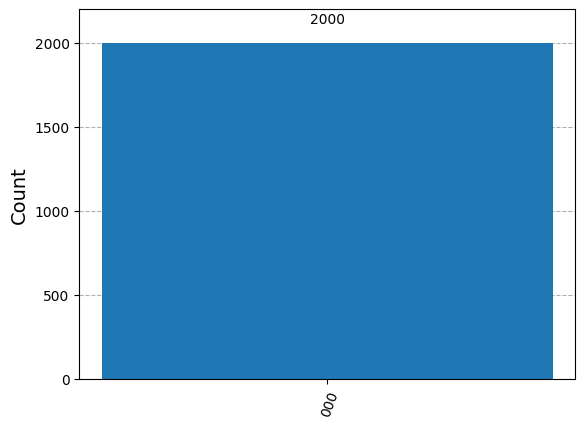

In [ ]:
backend=BasicSimulator()
result=backend.run(dj_ckt, shots=2000).result()
counts=result.get_counts(dj_ckt)
plot_histogram(counts)

In [ ]:
from qiskit.providers.fake_provider import GenericBackendV2

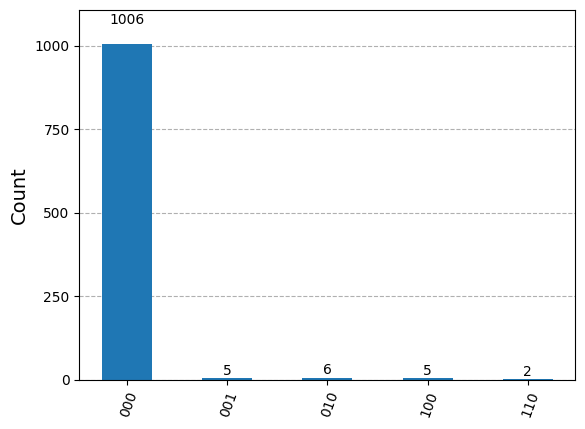

In [ ]:
backend=GenericBackendV2(num_qubits=4)
transpiled_circuit = transpile(dj_ckt, backend)
result=backend.run(transpiled_circuit).result()
counts=result.get_counts(dj_ckt)
plot_histogram(counts)